# МЧС "Прогнозирование опасностей и рисков Пермского края"!

In [1]:
import pandas as pd
import numpy as np

# from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tqdm import tqdm, trange
from tqdm.notebook import tqdm
# Включаем tqdm для pandas, чтобы можно было запускать progress_apply() вместо простого apply()
tqdm.pandas() 

In [3]:
# Убираем ограничение отображемых колонок
pd.options.display.max_columns = None

In [4]:
PATH = ""
union_dataset_file = PATH + "union_dataset_2.csv"

In [5]:
union_df = pd.read_csv(union_dataset_file)
union_df.shape

(141879, 1223)

### Схлопываем данные по погоде в агрегированные признаки

In [6]:
join_columns = {
 'WW_  Диаметр изморозевого отложения составляет 1 мм.': ['WW_  Диаметр изморозевого отложения составляет 1 мм.',
  'WW_  Диаметр изморозевого отложения составляет 10 мм.',
  'WW_  Диаметр изморозевого отложения составляет 11 мм.',
  'WW_  Диаметр изморозевого отложения составляет 13 мм.',
  'WW_  Диаметр изморозевого отложения составляет 16 мм.',
  'WW_  Диаметр изморозевого отложения составляет 17 мм.',
  'WW_  Диаметр изморозевого отложения составляет 2 мм.',
  'WW_  Диаметр изморозевого отложения составляет 20 мм.',
  'WW_  Диаметр изморозевого отложения составляет 24 мм.',
  'WW_  Диаметр изморозевого отложения составляет 25 мм.',
  'WW_  Диаметр изморозевого отложения составляет 26 мм.',
  'WW_  Диаметр изморозевого отложения составляет 3 мм.',
  'WW_  Диаметр изморозевого отложения составляет 30 мм.',
  'WW_  Диаметр изморозевого отложения составляет 32 мм.',
  'WW_  Диаметр изморозевого отложения составляет 33 мм.',
  'WW_  Диаметр изморозевого отложения составляет 34 мм.',
  'WW_  Диаметр изморозевого отложения составляет 35 мм.',
  'WW_  Диаметр изморозевого отложения составляет 36 мм.',
  'WW_  Диаметр изморозевого отложения составляет 37 мм.',
  'WW_  Диаметр изморозевого отложения составляет 38 мм.',
  'WW_  Диаметр изморозевого отложения составляет 4 мм.',
  'WW_  Диаметр изморозевого отложения составляет 40 мм.',
  'WW_  Диаметр изморозевого отложения составляет 42 мм.',
  'WW_  Диаметр изморозевого отложения составляет 43 мм.',
  'WW_  Диаметр изморозевого отложения составляет 5 мм.',
  'WW_  Диаметр изморозевого отложения составляет 6 мм.',
  'WW_  Диаметр изморозевого отложения составляет 7 мм.',
  'WW_  Диаметр изморозевого отложения составляет 8 мм.',
  'WW_  Диаметр изморозевого отложения составляет 9 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 10 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 12 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 120 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 18 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 2 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 3 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 4 мм.',
  'WW_  Диаметр отложения мокрого снега составляет 8 мм.',
  'WW_  Диаметр отложения при гололеде составляет 0.4 мм.',
  'WW_  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_  Диаметр отложения при гололеде составляет 10 мм.',
  'WW_  Диаметр отложения при гололеде составляет 11 мм.',
  'WW_  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_  Диаметр отложения при гололеде составляет 6 мм.',
  'WW_  Диаметр отложения при гололеде составляет 7 мм.',
  'WW_  Диаметр отложения при гололеде составляет 8 мм.',
  'WW_  Диаметр смешанного отложения составляет 1 мм.',
  'WW_  Диаметр смешанного отложения составляет 10 мм.',
  'WW_  Диаметр смешанного отложения составляет 11 мм.',
  'WW_  Диаметр смешанного отложения составляет 12 мм.',
  'WW_  Диаметр смешанного отложения составляет 120 мм.',
  'WW_  Диаметр смешанного отложения составляет 13 мм.',
  'WW_  Диаметр смешанного отложения составляет 14 мм.',
  'WW_  Диаметр смешанного отложения составляет 15 мм.',
  'WW_  Диаметр смешанного отложения составляет 16 мм.',
  'WW_  Диаметр смешанного отложения составляет 17 мм.',
  'WW_  Диаметр смешанного отложения составляет 18 мм.',
  'WW_  Диаметр смешанного отложения составляет 19 мм.',
  'WW_  Диаметр смешанного отложения составляет 2 мм.',
  'WW_  Диаметр смешанного отложения составляет 20 мм.',
  'WW_  Диаметр смешанного отложения составляет 21 мм.',
  'WW_  Диаметр смешанного отложения составляет 22 мм.',
  'WW_  Диаметр смешанного отложения составляет 23 мм.',
  'WW_  Диаметр смешанного отложения составляет 24 мм.',
  'WW_  Диаметр смешанного отложения составляет 25 мм.',
  'WW_  Диаметр смешанного отложения составляет 26 мм.',
  'WW_  Диаметр смешанного отложения составляет 27 мм.',
  'WW_  Диаметр смешанного отложения составляет 28 мм.',
  'WW_  Диаметр смешанного отложения составляет 29 мм.',
  'WW_  Диаметр смешанного отложения составляет 3 мм.',
  'WW_  Диаметр смешанного отложения составляет 30 мм.',
  'WW_  Диаметр смешанного отложения составляет 31 мм.',
  'WW_  Диаметр смешанного отложения составляет 33 мм.',
  'WW_  Диаметр смешанного отложения составляет 34 мм.',
  'WW_  Диаметр смешанного отложения составляет 35 мм.',
  'WW_  Диаметр смешанного отложения составляет 36 мм.',
  'WW_  Диаметр смешанного отложения составляет 37 мм.',
  'WW_  Диаметр смешанного отложения составляет 39 мм.',
  'WW_  Диаметр смешанного отложения составляет 4 мм.',
  'WW_  Диаметр смешанного отложения составляет 40 мм.',
  'WW_  Диаметр смешанного отложения составляет 42 мм.',
  'WW_  Диаметр смешанного отложения составляет 43 мм.',
  'WW_  Диаметр смешанного отложения составляет 44 мм.',
  'WW_  Диаметр смешанного отложения составляет 45 мм.',
  'WW_  Диаметр смешанного отложения составляет 49 мм.',
  'WW_  Диаметр смешанного отложения составляет 5 мм.',
  'WW_  Диаметр смешанного отложения составляет 50 мм.',
  'WW_  Диаметр смешанного отложения составляет 52 мм.',
  'WW_  Диаметр смешанного отложения составляет 6 мм.',
  'WW_  Диаметр смешанного отложения составляет 7 мм.',
  'WW_  Диаметр смешанного отложения составляет 8 мм.',
  'WW_  Диаметр смешанного отложения составляет 9 мм.',
  'WW_  Максимальный диаметр градин составляет 1 мм.',
  'WW_  Максимальный диаметр градин составляет 4 мм.',],

'WW_Алмазная пыль (с туманом или без него). ': [ 'WW_Алмазная пыль (с туманом или без него). ',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр изморозевого отложения составляет 1 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр изморозевого отложения составляет 2 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр изморозевого отложения составляет 3 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр изморозевого отложения составляет 30 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр изморозевого отложения составляет 38 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр изморозевого отложения составляет 5 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр смешанного отложения составляет 17 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Алмазная пыль (с туманом или без него).  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Более или менее сплошной слой приземного или ледяного тумана на станции, на море или на суше, высотой не более 2 м над сушей или не более 10 м над морем. ',
 'WW_Видимость ухудшена дымом, например: от степных или лесных пожаров, промышленных предприятий или вулканическим пеплом. ',
 'WW_Видна молния, грома не слышно. ',],

'WW_Гроза (с осадками или без них). ': [ 'WW_Гроза (с осадками или без них). ',
 'WW_Гроза (с осадками или без них).  Максимальный диаметр градин составляет 10 мм.',
 'WW_Гроза (с осадками или без них).  Максимальный диаметр градин составляет 2 мм.',
 'WW_Гроза (с осадками или без них).  Максимальный диаметр градин составляет 3 мм.',
 'WW_Гроза (с осадками или без них).  Максимальный диаметр градин составляет 4 мм.',
 'WW_Гроза (с осадками или без них).  Максимальный диаметр градин составляет 5 мм.',
 'WW_Гроза (с осадками или без них).  Максимальный диаметр градин составляет 8 мм.',
 'WW_Гроза вместе с пыльной или песчаной бурей в срок наблюдения. ',
 'WW_Гроза сильная без града, но с дождем и/или снегом в срок наблюдения. ',
 'WW_Гроза сильная с градом в срок наблюдения. ',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения. ',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 1 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 10 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 11 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 13 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 14 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 2 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 32 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 6 мм.',
 'WW_Гроза слабая или умеренная без града, но с дождем и/или снегом в срок наблюдения.  Максимальный диаметр градин составляет 8 мм.',
 'WW_Гроза слабая или умеренная с градом в срок наблюдения. ',
 'WW_Гроза слабая или умеренная с градом в срок наблюдения.  Максимальный диаметр градин составляет 10 мм.',
 'WW_Гроза слабая или умеренная с градом в срок наблюдения.  Максимальный диаметр градин составляет 4 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения. ',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 10 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 12 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 13 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 14 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 3 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 5 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 7 мм.',
 'WW_Гроза, но без осадков, в срок наблюдения.  Максимальный диаметр градин составляет 8 мм.',
 'WW_Дождь (незамерзающий) неливневый. ',
 'WW_Дождь (незамерзающий) неливневый.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь (незамерзающий) неливневый.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь (незамерзающий) неливневый.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дождь (незамерзающий) неливневый.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Дождь (незамерзающий) неливневый.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Дождь (незамерзающий) неливневый.  Максимальный диаметр градин составляет 2 мм.',
 'WW_Дождь замерзающий слабый. ',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 0.1 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 10 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 11 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 13 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр отложения при гололеде составляет 7 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Дождь замерзающий слабый.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Дождь замерзающий умеренный или сильный. ',
 'WW_Дождь замерзающий умеренный или сильный.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь замерзающий умеренный или сильный.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь замерзающий умеренный или сильный.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дождь замерзающий умеренный или сильный.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Дождь или морось со снегом слабые. ',
 'WW_Дождь или морось со снегом слабые.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр смешанного отложения составляет 13 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Дождь или морось со снегом слабые.  Диаметр смешанного отложения составляет 9 мм.',
 'WW_Дождь или морось со снегом слабые.  Максимальный диаметр градин составляет 1 мм.',
 'WW_Дождь или морось со снегом умеренные или сильные. ',
 'WW_Дождь или морось со снегом умеренные или сильные.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь или морось со снегом умеренные или сильные.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь или морось со снегом умеренные или сильные.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дождь незамерзающий непрерывный сильный в срок наблюдения. ',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения. ',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 8 мм.',
 'WW_Дождь незамерзающий непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Дождь незамерзающий непрерывный умеренный в срок наблюдения. ',
 'WW_Дождь незамерзающий непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь незамерзающий непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь незамерзающий непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дождь незамерзающий непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Дождь незамерзающий непрерывный умеренный в срок наблюдения.  Максимальный диаметр градин составляет 5 мм.',
 'WW_Дождь незамерзающий с перерывами сильный в срок наблюдения. ',
 'WW_Дождь незамерзающий с перерывами слабый в срок наблюдения. ',
 'WW_Дождь незамерзающий с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь незамерзающий с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь незамерзающий с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Дождь незамерзающий с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 8 мм.',
 'WW_Дождь незамерзающий с перерывами умеренный в срок наблюдения. ',
 'WW_Дождь незамерзающий с перерывами умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 15 мм.',
 'WW_Дождь незамерзающий слабый. ',
 'WW_Дождь со снегом или ледяная крупа неливневые. ',
 'WW_Дождь со снегом или ледяная крупа неливневые.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дождь со снегом или ледяная крупа неливневые.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дождь со снегом или ледяная крупа неливневые.  Диаметр смешанного отложения составляет 120 мм.',],

'WW_Дымка. ': [ 'WW_Дымка. ',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 1 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 10 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 12 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 13 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 17 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 2 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 20 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 24 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 25 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 3 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 30 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 32 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 35 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 37 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 38 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 4 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 40 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 43 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 5 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 6 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 8 мм.',
 'WW_Дымка.  Диаметр изморозевого отложения составляет 9 мм.',
 'WW_Дымка.  Диаметр отложения мокрого снега составляет 14 мм.',
 'WW_Дымка.  Диаметр отложения мокрого снега составляет 17 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 0.3 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 10 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 11 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 2 мм. Диаметр смешанного отложения составляет 1 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 7 мм.',
 'WW_Дымка.  Диаметр отложения при гололеде составляет 8 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 11 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 12 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 16 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 18 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 20 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 21 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 22 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 23 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 24 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 25 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 27 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 28 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 29 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 30 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 32 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 33 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 39 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 40 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 42 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 5 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 6 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 8 мм.',
 'WW_Дымка.  Диаметр смешанного отложения составляет 9 мм.',],

 'WW_Замерзающая морось или замерзающий дождь неливневые. ': ['WW_Замерзающая морось или замерзающий дождь неливневые. ',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр отложения при гололеде составляет 12 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр смешанного отложения составляет 23 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр смешанного отложения составляет 6 мм.',
  'WW_Замерзающая морось или замерзающий дождь неливневые.  Диаметр смешанного отложения составляет 7 мм.',
  'WW_Клочья приземного или ледяного тумана на станции, на море или на суше, высотой не более 2 м над сушей или не более 10 м над морем. ',],


'WW_Ливневый снег или ливневый дождь и снег. ': [
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час. ',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 11 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 11 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 12 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом слабые в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом умеренные или сильные в срок наблюдения или за последний час. ',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом умеренные или сильные в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом умеренные или сильные в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом умеренные или сильные в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 1 мм.',
 'WW_Ливневая снежная крупа или небольшой град с дождем или без него, или дождь со снегом умеренные или сильные в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 6 мм.',
 'WW_Ливневый снег или ливневый дождь и снег. ',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр изморозевого отложения составляет 1 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр изморозевого отложения составляет 15 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр изморозевого отложения составляет 2 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр изморозевого отложения составляет 3 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр изморозевого отложения составляет 4 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения мокрого снега составляет 1 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения мокрого снега составляет 11 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения мокрого снега составляет 12 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения мокрого снега составляет 13 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения мокрого снега составляет 20 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения мокрого снега составляет 3 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 10 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 11 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр отложения при гололеде составляет 8 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 21 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 23 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 25 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 37 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 39 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Диаметр смешанного отложения составляет 9 мм.',
 'WW_Ливневый снег или ливневый дождь и снег.  Максимальный диаметр градин составляет 2 мм.',
 'WW_Ледяная крупа. ',
 'WW_Ледяная крупа.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Ледяная крупа.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Ледяная крупа.  Диаметр смешанного отложения составляет 2 мм.', 
 'WW_Ливневый снег слабый в срок наблюдения или за последний час. ',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 1 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 15 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 17 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 2 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 24 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 25 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 26 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 30 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 5 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 6 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр изморозевого отложения составляет 8 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 11 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 17 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 26 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 29 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 3 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 11 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 12 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 7 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 8 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 11 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 12 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 14 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 15 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 17 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 20 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 21 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 22 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 23 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 24 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 25 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 28 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 30 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 33 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 34 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 35 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 36 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 42 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 44 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 5 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 50 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 6 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 8 мм.',
 'WW_Ливневый снег слабый в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 9 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час. ',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 10 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 12 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 15 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 17 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения мокрого снега составляет 30 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 10 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 5 мм. Диаметр смешанного отложения составляет 5 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 6 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 8 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 9 мм.',
 'WW_Ливневый снег умеренный или сильный в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 1 мм.',],
 
 'WW_Ливневый(ые) дождь(и). ': ['WW_Ливневый(ые) дождь(и) очень сильный(ые) в срок наблюдения или за последний час. ',
 'WW_Ливневый град с дождем или без него, или дождь со снегом без грома слабый в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 2 мм.',
 'WW_Ливневый град с дождем или без него, или дождь со снегом без грома слабый в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 5 мм.',
 'WW_Ливневый град с дождем или без него, или дождь со снегом без грома слабый в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 6 мм.',
 'WW_Ливневый град с дождем или без него, или дождь со снегом без грома умеренный или сильный в срок наблюдения или за последний час. ',
 'WW_Ливневый град с дождем или без него, или дождь со снегом без грома умеренный или сильный в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 5 мм.',
 'WW_Ливневый град, или дождь и град. ',
 'WW_Ливневый град, или дождь и град.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Ливневый град, или дождь и град.  Максимальный диаметр градин составляет 10 мм.',
 'WW_Ливневый град, или дождь и град.  Максимальный диаметр градин составляет 2 мм.',
 'WW_Ливневый град, или дождь и град.  Максимальный диаметр градин составляет 3 мм.',
 'WW_Ливневый град, или дождь и град.  Максимальный диаметр градин составляет 4 мм.',
 'WW_Ливневый град, или дождь и град.  Максимальный диаметр градин составляет 8 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час. ',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Диаметр смешанного отложения составляет 5 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 2 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 3 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 4 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 5 мм.',
  'WW_Ливневый(ые) дождь(и) слабый(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 8 мм.',
  'WW_Ливневый(ые) дождь(и) со снегом слабый(ые) в срок наблюдения или за последний час. ',
  'WW_Ливневый(ые) дождь(и) со снегом слабый(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Ливневый(ые) дождь(и) со снегом слабый(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Ливневый(ые) дождь(и) со снегом умеренный(ые) или сильный(ые) в срок наблюдения или за последний час. ',
  'WW_Ливневый(ые) дождь(и) со снегом умеренный(ые) или сильный(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Ливневый(ые) дождь(и) умеренный(ые) или сильный(ые) в срок наблюдения или за последний час. ',
  'WW_Ливневый(ые) дождь(и) умеренный(ые) или сильный(ые) в срок наблюдения или за последний час.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Ливневый(ые) дождь(и) умеренный(ые) или сильный(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 10 мм.',
  'WW_Ливневый(ые) дождь(и) умеренный(ые) или сильный(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 5 мм.',
  'WW_Ливневый(ые) дождь(и) умеренный(ые) или сильный(ые) в срок наблюдения или за последний час.  Максимальный диаметр градин составляет 8 мм.',
  'WW_Ливневый(ые) дождь(и). ',
  'WW_Ливневый(ые) дождь(и).  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Ливневый(ые) дождь(и).  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Ливневый(ые) дождь(и).  Диаметр смешанного отложения составляет 42 мм.',
  'WW_Ливневый(ые) дождь(и).  Диаметр смешанного отложения составляет 5 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 1 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 19 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 2 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 3 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 4 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 5 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 6 мм.',
  'WW_Ливневый(ые) дождь(и).  Максимальный диаметр градин составляет 8 мм.',],

 'WW_Мгла. ': ['WW_Мгла или дым, или пыль, взвешенная в воздухе, дальность видимости 1 км или более. ',
  'WW_Мгла. ',],

 'WW_Морось (незамерзающая) или снежные зерна неливневые. ': ['WW_Морось (незамерзающая) или снежные зерна неливневые. ',
  'WW_Морось (незамерзающая) или снежные зерна неливневые.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Морось (незамерзающая) или снежные зерна неливневые.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Морось (незамерзающая) или снежные зерна неливневые.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Морось (незамерзающая) или снежные зерна неливневые.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Морось замерзающая слабая. ',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 0.1 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 0.2 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 0.4 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 6 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 7 мм.',
  'WW_Морось замерзающая слабая.  Диаметр отложения при гололеде составляет 8 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 1 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 10 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 12 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 14 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 16 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 18 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 19 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 20 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 21 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 27 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 28 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 34 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 5 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 6 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 7 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 8 мм.',
  'WW_Морось замерзающая слабая.  Диаметр смешанного отложения составляет 9 мм.',
  'WW_Морось замерзающая умеренная или сильная. ',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр отложения при гололеде составляет 11 мм.',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр смешанного отложения составляет 13 мм.',
  'WW_Морось замерзающая умеренная или сильная.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Морось и дождь слабые. ',
  'WW_Морось и дождь слабые.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Морось и дождь умеренные или сильные. ',
  'WW_Морось незамерзающая непрерывная сильная в срок наблюдения. ',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения. ',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр отложения мокрого снега составляет 9 мм.',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр отложения при гололеде составляет 7 мм.',
  'WW_Морось незамерзающая непрерывная слабая в срок наблюдения.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Морось незамерзающая непрерывная умеренная в срок наблюдения. ',
  'WW_Морось незамерзающая непрерывная умеренная в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Морось незамерзающая непрерывная умеренная в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Морось незамерзающая непрерывная умеренная в срок наблюдения.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Морось незамерзающая с перерывами слабая в срок наблюдения. ',
  'WW_Морось незамерзающая с перерывами слабая в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Морось незамерзающая с перерывами слабая в срок наблюдения.  Диаметр смешанного отложения составляет 8 мм.',
  'WW_Морось незамерзающая с перерывами умеренная в срок наблюдения. ',],

 'WW_Облака в целом образовывались или развивались. ': ['WW_Облака в целом образовывались или развивались. ',
 'WW_Облака в целом образовывались или развивались.  Диаметр изморозевого отложения составляет 4 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр изморозевого отложения составляет 6 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр отложения при гололеде составляет 10 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 12 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 13 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 5 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 6 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Облака в целом образовывались или развивались.  Диаметр смешанного отложения составляет 9 мм.',
 'WW_Облака в целом образовывались или развивались.  Максимальный диаметр градин составляет 4 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми. ',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр изморозевого отложения составляет 1 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр изморозевого отложения составляет 13 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр изморозевого отложения составляет 17 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр изморозевого отложения составляет 2 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр изморозевого отложения составляет 4 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения мокрого снега составляет 10 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения мокрого снега составляет 13 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения мокрого снега составляет 2 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр отложения при гололеде составляет 8 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 11 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 12 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 13 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 14 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 15 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 16 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 21 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 22 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 24 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 30 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 45 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 49 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 5 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 50 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 6 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 8 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Диаметр смешанного отложения составляет 9 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Максимальный диаметр градин составляет 14 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Максимальный диаметр градин составляет 2 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Максимальный диаметр градин составляет 7 мм.',
 'WW_Облака в целом рассеиваются или становятся менее развитыми.  Максимальный диаметр градин составляет 8 мм.',],

 'WW_Осадки в поле зрения, не достигающие поверхности земли или моря поблизости. ': ['WW_Осадки в поле зрения, достигающие поверхности земли или моря на расстоянии более 5 км от станции. ',
 'WW_Осадки в поле зрения, достигающие поверхности земли или моря поблизости, но не на самой станции. ',
 'WW_Осадки в поле зрения, не достигающие поверхности земли или моря поблизости. ',
 'WW_Отдельные кристаллы снега в виде звездочек (с туманом или без него). ',
 'WW_Отдельные кристаллы снега в виде звездочек (с туманом или без него).  Диаметр изморозевого отложения составляет 4 мм.',
 'WW_Пыль или песок, поднятые ветром на или вблизи станции в срок наблюдения, но нет хорошо развитого пыльного или песчаного вихря (вихрей), и никакой пыльной или песчаной бури не видно; или, в случае сообщения с судна или с береговой станции, брызги, переносимые ветром на станции. ',
 'WW_Пыль, взвешенная в воздухе на обширном пространстве, но не поднятая ветром на или вблизи станции в срок наблюдения. ',
 'WW_Пыльная или песчаная буря в поле зрения в срок наблюдения или на станции в течение последнего часа. ',
 'WW_Развитие облачности не наблюдалось или не наблюдается. ',
  'WW_Сильная пыльная или песчаная буря началась или усилилась в течение последнего часа. ',
  'WW_Сильная снежная низовая метель в целом высокая (выше уровня глаз наблюдателя). ',
  'WW_Сильный поземок в целом низкий (ниже уровня глаз наблюдателя). ',
  'WW_Слабая или умеренная пыльная или песчаная буря без заметного изменения в течение последнего часа. ',
  'WW_Слабая или умеренная пыльная или песчаная буря началась или усилилась в течение последнего часа. ',
  'WW_Слабая или умеренная пыльная или песчаная буря ослабела за последний час. ',
  'WW_Слабая или умеренная снежная низовая метель в целом высокая (выше уровня глаз наблюдателя). ',],

'WW_Слабый дождь в срок наблюдения. Гроза в течение последнего часа, но не в срок наблюдения. ': ['WW_Слабый дождь в срок наблюдения. Гроза в течение последнего часа, но не в срок наблюдения. ',
 'WW_Слабый дождь в срок наблюдения. Гроза в течение последнего часа, но не в срок наблюдения.  Максимальный диаметр градин составляет 8 мм.',],

'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя). ': [ 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя). ',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр изморозевого отложения составляет 10 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр изморозевого отложения составляет 25 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 18 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 21 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 22 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 23 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 28 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Слабый или умеренный поземок в целом низкий (ниже уровня глаз наблюдателя).  Диаметр смешанного отложения составляет 50 мм.',],

'WW_Снег неливневый. ': [ 'WW_Снег неливневый. ',
 'WW_Снег неливневый.  Диаметр изморозевого отложения составляет 13 мм.',
 'WW_Снег неливневый.  Диаметр изморозевого отложения составляет 2 мм.',
 'WW_Снег неливневый.  Диаметр изморозевого отложения составляет 25 мм.',
 'WW_Снег неливневый.  Диаметр изморозевого отложения составляет 35 мм.',
 'WW_Снег неливневый.  Диаметр изморозевого отложения составляет 4 мм.',
 'WW_Снег неливневый.  Диаметр изморозевого отложения составляет 5 мм.',
 'WW_Снег неливневый.  Диаметр отложения мокрого снега составляет 14 мм.',
 'WW_Снег неливневый.  Диаметр отложения мокрого снега составляет 2 мм.',
 'WW_Снег неливневый.  Диаметр отложения мокрого снега составляет 4 мм.',
 'WW_Снег неливневый.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Снег неливневый.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Снег неливневый.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Снег неливневый.  Диаметр отложения при гололеде составляет 4 мм.',
 'WW_Снег неливневый.  Диаметр отложения при гололеде составляет 5 мм.',
 'WW_Снег неливневый.  Диаметр отложения при гололеде составляет 6 мм.',
 'WW_Снег неливневый.  Диаметр отложения при гололеде составляет 7 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 0.3 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 11 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 12 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 120 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 13 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 15 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 16 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 17 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 18 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 21 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 24 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 25 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 5 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 6 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 7 мм.',
 'WW_Снег неливневый.  Диаметр смешанного отложения составляет 9 мм.',],

'WW_Снег непрерывный сильный в срок наблюдения. ': [ 'WW_Снег непрерывный сильный в срок наблюдения. ',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр изморозевого отложения составляет 24 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр отложения мокрого снега составляет 11 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр отложения мокрого снега составляет 2 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр отложения мокрого снега составляет 37 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр отложения мокрого снега составляет 7 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 1 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 10 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 3 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 4 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 5 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 6 мм.',
 'WW_Снег непрерывный сильный в срок наблюдения.  Диаметр смешанного отложения составляет 9 мм.',],

 'WW_Снег непрерывный слабый в срок наблюдения. ': ['WW_Снег непрерывный слабый в срок наблюдения. ',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 1 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 10 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 11 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 13 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 15 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 2 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 24 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 25 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 3 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 33 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 35 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 36 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 38 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 4 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 40 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 41 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 5 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 6 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 7 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 1 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 10 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 11 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 12 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 13 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 14 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 15 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 16 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 17 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 18 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 2 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 21 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 26 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 27 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 3 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 4 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 5 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 6 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 7 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 8 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 0.2 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 0.3 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 0.5 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 11 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 12 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 6 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 7 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 8 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 1 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 10 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 11 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 12 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 120 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 13 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 14 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 15 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 16 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 17 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 18 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 19 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 20 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 21 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 22 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 23 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 24 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 25 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 26 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 27 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 28 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 30 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 32 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 33 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 34 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 35 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 36 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 37 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 38 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 39 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 40 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 42 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 44 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 45 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 49 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 5 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 50 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 52 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 6 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 7 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 8 мм.',
  'WW_Снег непрерывный слабый в срок наблюдения.  Диаметр смешанного отложения составляет 9 мм.',],

 'WW_Снег непрерывный умеренный в срок наблюдения. ': ['WW_Снег непрерывный умеренный в срок наблюдения. ',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр изморозевого отложения составляет 13 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр изморозевого отложения составляет 2 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр изморозевого отложения составляет 24 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр изморозевого отложения составляет 4 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 1 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 10 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 11 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 12 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 13 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 14 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 15 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 17 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 18 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 19 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 2 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 20 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 24 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 3 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 4 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения мокрого снега составляет 5 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 0.3 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 6 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 8 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 0.5 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 1 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 10 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 11 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 12 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 120 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 13 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 17 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 20 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 21 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 22 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 23 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 24 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 25 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 26 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 27 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 28 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 35 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 36 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 37 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 38 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 40 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 49 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 5 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 50 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 6 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 7 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 8 мм.',
  'WW_Снег непрерывный умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 9 мм.',],
 
 'WW_Снег с перерывами сильный в срок наблюдения. ': ['WW_Снег с перерывами сильный в срок наблюдения. ',
  'WW_Снег с перерывами сильный в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Снег с перерывами сильный в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Снег с перерывами сильный в срок наблюдения.  Диаметр смешанного отложения составляет 7 мм.',],

 'WW_Снег с перерывами слабый в срок наблюдения. ': ['WW_Снег с перерывами слабый в срок наблюдения. ',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 1 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 2 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 3 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 4 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 5 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр изморозевого отложения составляет 9 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 11 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 12 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 15 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 18 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 2 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения мокрого снега составляет 5 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 14 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 6 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр отложения при гололеде составляет 8 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 1 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 10 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 12 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 13 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 15 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 20 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 24 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 35 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 5 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 6 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 7 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 8 мм.',
  'WW_Снег с перерывами слабый в срок наблюдения.  Диаметр смешанного отложения составляет 9 мм.',],

 'WW_Снег с перерывами умеренный в срок наблюдения. ': ['WW_Снег с перерывами умеренный в срок наблюдения. ',
 'WW_Снег с перерывами умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 1 мм.',
 'WW_Снег с перерывами умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 2 мм.',
 'WW_Снег с перерывами умеренный в срок наблюдения.  Диаметр отложения при гололеде составляет 3 мм.',
 'WW_Снег с перерывами умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 2 мм.',
 'WW_Снег с перерывами умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 28 мм.',
 'WW_Снег с перерывами умеренный в срок наблюдения.  Диаметр смешанного отложения составляет 6 мм.',],

 'WW_Снежные зерна (с туманом или без него). ': ['WW_Снежные зерна (с туманом или без него). ', 
 'WW_Снежные зерна (с туманом или без него).  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 1 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 12 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 21 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 6 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 7 мм.',
  'WW_Снежные зерна (с туманом или без него).  Диаметр смешанного отложения составляет 8 мм.',
 ],
    
    'Cm_Высокослоистые просвечивающие.': ['Cm_Высококучевые башенкообразные или хлопьевидные.',
  'Cm_Высококучевые при хаотическом виде неба, обычно расположенные на нескольких уровнях.',
  'Cm_Высококучевые просвечивающие, полосами, либо один или несколько слоев высококучевых просвечивающих, распространяющихся по небу; эти высококучевые в целом уплотняются.',
  'Cm_Высококучевые просвечивающие, расположенные на одном уровне.',
  'Cm_Высококучевые, образовавшиеся из кучевых (или кучево-дождевых).',
  'Cm_Высококучевые, просвечивающие или плотные в двух или более слоях или высококучевые плотные в одном слое, не распространяющиеся но небу, либо высококучевые с высокослоистыми или слоисто-дождевыми.',
  'Cm_Высококучевых, высокослоистых или слоисто-дождевых облаков нет.',
  'Cm_Высокослоистые непросвечивающие или слоисто-дождевые.',
  'Cm_Высокослоистые просвечивающие.',
  'Cm_Клочья (часто чечевицеобразные) высококучевых просвечивающих, непрерывно изменяющихся; расположены на одном или более уровнях.',
  'Ch_Перисто-кучевые одни или перисто-кучевые, сопровождаемые перистыми или перисто-слоистыми, либо те и другие, но перисто-кучевые преобладают среди них.',
  'Ch_Перисто-слоистые, не распространяющиеся по небу и не покрывающие его полностью.',
  'Ch_Перисто-слоистые, покрывающие все небо.',
  'Ch_Перистые (часто в виде полос) и перисто-слоистые, распространяющиеся по небу и в целом обычно уплотняющиеся, но сплошная пелена поднимается над горизонтом менее чем на 45°.',
  'Ch_Перистые (часто в виде полос) и перисто-слоистые, распространяющиеся по небу и в целом обычно уплотняющиеся; сплошная пелена, поднимающаяся над горизонтом выше 45°, не покрывает всего неба.',
  'Ch_Перистые когтевидные или нитевидные или первые и вторые, распространяющиеся по небу и в целом обычно уплотняющиеся.',
  'Ch_Перистые нитевидные, иногда когтевидные, не распространяющиеся по небу.',
  'Ch_Перистые плотные в виде клочьев или скрученных склонов, количество которых обычно не увеличивается, иногда могут казаться остатками верхней части кучево-дождевых; или перистые башенкообразные, или перистые хлопьевидные.',
  'Ch_Перистые плотные, образовавшиеся от кучево-дождевых.',
  'Ch_Перистых, перисто-кучевых или перисто-слоистых нет.',],
    
 'Nh_Облаков нет.':['Nh_Облаков нет.',
  'H_Наблюдений за облкаками нет',
  'Nh_Наблюдений нет',
  'Cm_Наблюдений за небом нет',
  'Ch_Наблюдений неба нет',],    

 'WW_Состояние неба в общем не изменилось. ': ['WW_Состояние неба в общем не изменилось. ',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 1 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 15 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 2 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 25 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 26 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 27 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 3 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 30 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 36 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 38 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 4 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 5 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр изморозевого отложения составляет 7 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 1 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 10 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 11 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 12 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 13 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 14 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 15 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 18 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 2 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 25 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 27 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 3 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения мокрого снега составляет 6 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 0.2 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 0.4 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 0.5 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 11 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 5 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 6 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 7 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр отложения при гололеде составляет 8 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 1 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 10 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 11 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 12 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 120 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 13 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 14 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 15 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 16 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 17 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 18 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 19 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 20 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 21 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 22 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 23 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 24 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 25 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 26 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 27 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 28 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 30 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 33 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 34 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 36 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 37 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 38 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 39 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 40 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 42 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 44 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 5 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 50 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 52 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 6 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 7 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 8 мм.',
  'WW_Состояние неба в общем не изменилось.  Диаметр смешанного отложения составляет 9 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 1 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 10 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 11 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 17 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 19 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 2 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 20 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 3 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 5 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 6 мм.',
  'WW_Состояние неба в общем не изменилось.  Максимальный диаметр градин составляет 8 мм.',
  ],
    
'WW_Туман ':['WW_Туман ',
  'WW_Туман или ледяной туман на расстоянии в срок наблюдения, простирающийся выше уровня глаз наблюдателя. В течение последнего часа туман на станции не наблюдался. ',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа. ',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр отложения мокрого снега составляет 14 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр отложения при гололеде составляет 11 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр отложения при гололеде составляет 13 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр отложения при гололеде составляет 3 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 10 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 14 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 20 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 23 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 3 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Туман или ледяной туман, неба не видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 8 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа. ',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр отложения при гололеде составляет 10 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр отложения при гололеде составляет 11 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр отложения при гололеде составляет 4 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр смешанного отложения составляет 1 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр смешанного отложения составляет 2 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр смешанного отложения составляет 29 мм.',
  'WW_Туман или ледяной туман, неба не видно, начался или усилился в течение последнего часа.  Диаметр смешанного отложения составляет 4 мм.',
  'WW_Туман или ледяной туман, неба не видно, ослабел за последний час. ',
  'WW_Туман или ледяной туман, небо видно, без заметного изменения интенсивности в течение последнего часа. ',
  'WW_Туман или ледяной туман, небо видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр изморозевого отложения составляет 14 мм.',
  'WW_Туман или ледяной туман, небо видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр изморозевого отложения составляет 3 мм.',
  'WW_Туман или ледяной туман, небо видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 24 мм.',
  'WW_Туман или ледяной туман, небо видно, без заметного изменения интенсивности в течение последнего часа.  Диаметр смешанного отложения составляет 43 мм.',
  'WW_Туман или ледяной туман, небо видно, начался или усилился в течение последнего часа. ',
  'WW_Туман или ледяной туман, небо видно, начался или усилился в течение последнего часа.  Диаметр изморозевого отложения составляет 2 мм.',
  'WW_Туман или ледяной туман, небо видно, начался или усилился в течение последнего часа.  Диаметр изморозевого отложения составляет 4 мм.',
  'WW_Туман или ледяной туман, небо видно, начался или усилился в течение последнего часа.  Диаметр отложения мокрого снега составляет 2 мм.',
  'WW_Туман или ледяной туман, небо видно, начался или усилился в течение последнего часа.  Диаметр отложения мокрого снега составляет 20 мм.',
  'WW_Туман или ледяной туман, небо видно, начался или усилился в течение последнего часа.  Диаметр отложения при гололеде составляет 0.2 мм.',
  'WW_Туман или ледяной туман, небо видно, начался или усилился в течение последнего часа.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Туман или ледяной туман, небо видно, ослабел за последний час. ',
  'WW_Туман или ледяной туман, небо видно, ослабел за последний час.  Диаметр отложения при гололеде составляет 1 мм.',
  'WW_Туман или ледяной туман. ',
  'WW_Туман или ледяной туман.  Диаметр изморозевого отложения составляет 2 мм.',
  'WW_Туман или ледяной туман.  Диаметр изморозевого отложения составляет 5 мм.',
  'WW_Туман или ледяной туман.  Диаметр отложения при гололеде составляет 2 мм.',
  'WW_Туман или ледяной туман.  Диаметр смешанного отложения составляет 25 мм.',
  'WW_Туман или обрывки ледяного тумана. ',
  'WW_Туман с отложением изморози, неба не видно. ',
  'WW_Туман с отложением изморози, неба не видно.  Диаметр смешанного отложения составляет 10 мм.',
  'WW_Туман с отложением изморози, небо видно. ',
  'WW_Туман с отложением изморози, небо видно.  Диаметр изморозевого отложения составляет 1 мм.',
  'WW_Туман с отложением изморози, небо видно.  Диаметр изморозевого отложения составляет 11 мм.',
  'WW_Туман с отложением изморози, небо видно.  Диаметр изморозевого отложения составляет 5 мм.',
  'WW_Туман с отложением изморози, небо видно.  Диаметр смешанного отложения составляет 100 мм.',
  'WW_Туман с отложением изморози, небо видно.  Диаметр смешанного отложения составляет 11 мм.',
  'WW_Туман с отложением изморози, небо видно.  Диаметр смешанного отложения составляет 19 мм.',
  'WW_Туман с отложением изморози, небо видно.  Диаметр смешанного отложения составляет 24 мм.',
 ],    

 'Cl_Слоисто-кучевые, образовавшиеся из кучевых.': [
 'Cl_Кучево-дождевые волокнистые (часто с наковальней), либо с кучево-дождевыми лысыми, кучевыми, слоистыми, разорванно-дождевыми, либо без них.',
 'Cl_Кучево-дождевые лысые с кучевыми, слоисто-кучевыми или слоистыми, либо без них.',
 'Cl_Кучевые и слоисто-кучевые (но не слоисто-кучевые, образовавшиеся из кучевых), основания расположены на разных уровнях.',
 'Cl_Кучевые плоские или кучевые разорванные, или те и другие вместе, не относящиеся к облакам плохой погоды.',
 'Cl_Кучевые средние или мощные или вместе с кучевыми разорванными, или с кучевыми плоскими, или со слоисто-кучевыми, либо без них; основания всех этих облаков расположены на одном уровне.',
 'Cl_Слоисто-кучевые, образовавшиеся не из кучевых.',
 'Cl_Слоисто-кучевых, слоистых, кучевых или кучево-дождевых облаков нет.',
 'Cl_Слоистые разорванные или кучевые разорванные облака плохой погоды, либо те и другие вместе (разорванно-дождевые); обычно расположены под слоистыми или слоисто-дождевыми облаками.',
 'Cl_Слоистые туманообразные или слоистые разорванные, либо те и другие, но не относящиеся к облакам плохой погоды.',],
}


In [7]:
for root_column in tqdm(join_columns):
    union_df[root_column] = union_df[join_columns[root_column]].sum(axis=1)
    drop_columns = list(set(join_columns[root_column]) - set([root_column]))
    union_df = union_df.drop(columns=drop_columns, errors='ignore')

  0%|          | 0/26 [00:00<?, ?it/s]

In [8]:
union_df.shape

(141879, 148)

In [9]:
union_df = union_df.drop(columns='Unnamed: 0', errors='ignore')
union_df = union_df.rename(columns={'Муниципальное образование': 'region'})

In [10]:
region_rename_dict = {'Александровский муниципальный округ': 'Александровский МО', 
 'Бардымский муниципальный округ': 'Бардымский МО', 
 'Березовский муниципальный округ': 'Березовский МО', 
 'Большесосновский муниципальный округ': 'Большесосновский МО', 
 'Верещагинский городской округ': 'Верещагинский ГО', 
 'Гайнский муниципальный округ': 'Гайнский МО', 
 'муниципальное образование "город Березники"': 'ГО город Березники', 
 'Кизеловский городской округ': 'ГО город Кизел', 
 'Горнозаводский городской округ': 'Горнозаводский ГО', 
 'Губахинский муниципальный округ': 'Губахинский ГО', 
 'Добрянский городской округ': 'Добрянский ГО', 
 'Еловский муниципальный округ': 'Еловский МО', 
 'ЗАТО Звездный': 'ЗАТО Звёздный', 
 'Ильинский городской округ': 'Ильинский ГО', 
 'Карагайский муниципальный округ': 'Карагайский МО', 
 'Кишертский муниципальный округ': 'Кишертский МО', 
 'Косинский муниципальный округ': 'Косинский МО', 
 'Кочевский муниципальный округ': 'Кочевский МО', 
 'Красновишерский городской округ': 'Красновишерский ГО', 
 'Краснокамский городской округ': 'Краснокамский ГО', 
 'Кудымкарский муниципальный округ': 'Кудымкарский МО', 
 'Куединский муниципальный округ': 'Куединский МО', 
 'Кунгурский муниципальный округ': 'Кунгурский МО', 
 'Лысьвенский городской округ': 'Лысьвенский ГО', 
 'Нытвенский городской округ': 'Нытвенский ГО', 
 'Октябрьский городской округ': 'Октябрьский ГО', 
 'Ординский муниципальный округ': 'Ординский МО', 
 'Осинский городской округ': 'Осинский ГО', 
 'Оханский городской округ': 'Оханский ГО', 
 'Очерский городской округ': 'Очерский ГО', 
 'г. Пермь': 'Пермский ГО', 
 'Пермский муниципальный округ': 'Пермский МО', 
 'Сивинский муниципальный округ': 'Сивинский МО', 
 'Соликамский городской округ': 'Соликамский ГО', 
 'Суксунский городской округ': 'Суксунский ГО', 
 'Уинский муниципальный округ': 'Уинский МО', 
 'Чайковский городской округ': 'Чайковский ГО', 
 'Частинский муниципальный округ': 'Частинский МО', 
 'Чердынский городской округ': 'Чердынский ГО', 
 'Чернушинский городской округ': 'Чернушинский ГО', 
 'Чусовской городской округ': 'Чусовской ГО', 
 'Юрлинский муниципальный округ': 'Юрлинский МО', 
 'Юсьвинский муниципальный округ': 'Юсьвинский МО'}
union_df['region'] = union_df['region'].replace(region_rename_dict)

In [11]:
region_names = ['Большесосновский МО',
 'Горнозаводский ГО',
 'Добрянский ГО',
 'Краснокамский ГО',
 'Лысьвенский ГО',
 'Очерский ГО',
 'Пермский ГО',
 'Пермский МО',
 'Соликамский ГО',
 'Частинский МО',
 'Косинский МО',
 'Октябрьский ГО',
 'Сивинский МО',
 'Чердынский ГО',
 'ГО город Березники',
 'Кудымкарский МО',
 'Чусовской ГО',
 'Кунгурский МО',
 'Осинский ГО',
 'Уинский МО',
 'Карагайский МО',
 'Губахинский ГО',
 'Суксунский ГО',
 'Куединский МО',
 'Верещагинский ГО',
 'Александровский МО',
 'Ильинский ГО',
 'Оханский ГО',
 'Чернушинский ГО',
 'Юсьвинский МО',
 'Ординский МО',
 'Кишертский МО',
 'Чайковский ГО',
 'Юрлинский МО',
 'Бардымский МО',
 'Березовский МО',
 'Кочевский МО',
 'Красновишерский ГО',
 'ГО город Кизел',
 'Еловский МО',
 'Гайнский МО',
 'Нытвенский ГО',
 'ЗАТО Звёздный']

In [12]:
set(union_df['region'].unique())  - set(region_names)

set()

In [13]:
# union_df['Cl_Кучево-дождевые волокнистые (часто с наковальней), либо с кучево-дождевыми лысыми, кучевыми, слоистыми, разорванно-дождевыми, либо без них.'].value_counts()

In [16]:
union_df = union_df.rename(columns={'Местное время': 'date'})
union_df['date'] = pd.to_datetime(union_df['date'])

In [17]:
union_df['weekday'] = union_df['date'].dt.dayofweek
union_df['month'] = union_df['date'].dt.month
union_df['day'] = union_df['date'].dt.day
union_df['is_holiday'] = np.where(((union_df['weekday'] == 6)|(union_df['weekday'] == 5)), 1, 0)

In [68]:
# Вывод графика feature importance
def plot_feature_importance(importance, names, model_name="", top_n=-1, skip_columns=[]):
    """Функция вывода feature importance
        :importance - массив важности фичей, полученный от модели
        :names - массив названий фичей
        :model_name - название модели
        :top_n - кол-во выводимых фичей
        :skip_columns: какие фичи пропустить, такое может понадобиться чтобы временно убрать 
                        из отображаемых горячие фичи, и изучить менее сильные
        :return - fi_df - feature importance датафрейм
    """
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df = fi_df[~fi_df['feature_names'].isin(skip_columns)]
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'][:top_n], y=fi_df['feature_names'][:top_n])
    if top_n != -1:
        plt.title(f"{model_name} FEATURE IMPORTANCE (Top: {top_n})")
    else:
        plt.title(f"{model_name} FEATURE IMPORTANCE")
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    return fi_df

In [69]:
# Вывод графика ROC-AUC
def plot_roc_auc(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_pred)
    roc_auc = roc_auc_score(y_true=y_true, y_score=y_pred)

    plt.figure(figsize=(10, 3))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc, alpha=0.5)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()
    return roc_auc

# Аварии

In [14]:
target_columns = [
 'Аварии на транспорте',
 'Аварии с выбросом опасных/токсичных веществ',
 'Взрывы/пожары/разрушения',
 'ЖКХ',
 'Опасные природные явления',
 'Прочие опасности',
 ]

In [15]:
for target in  target_columns:
    union_df[target] = np.where((union_df[target] >= 1), 1, 0)

In [18]:
# union_df = union_df.rename(columns={
#     'Cl_Слоистые разорванные или кучевые разорванные облака плохой погоды, либо те и другие вместе (разорванно-дождевые); обычно расположены под слоистыми или слоисто-дождевыми облаками.': 'Cl_Слоистые облака'
#     'Cl_Слоистые туманообразные или слоистые разорванные, либо те и другие, но не относящиеся к облакам плохой погоды.': 'Cl_Слоистые облака без плохой погоды',
#                                    })

In [76]:
# list(union_df.columns)

In [77]:
# union_df['W2_Морось.'].value_counts()

In [66]:
cat_columns = ['region', 'Метеорологическая станция']
feature_columns = list(set(union_df.columns) - set(target_columns))

In [62]:
# def train_model(target_column)
target_column = 'Аварии на транспорте'
target_columns = [
 'Аварии на транспорте',
 'Аварии с выбросом опасных/токсичных веществ',
 'Взрывы/пожары/разрушения',
 'ЖКХ',
 'Опасные природные явления',
 'Прочие опасности',
 ]

In [84]:
union_df['Прочие опасности'] = np.where((union_df['Аварии с выбросом опасных/токсичных веществ'] == 1)|(union_df['Опасные природные явления'] == 1), 1, union_df['Прочие опасности'])

In [94]:
date_train = '2022-04-01'
date_val = '2022-09-01'
train_df = union_df[union_df['date'] <= date_train]
val_df = union_df[(union_df['date'] > date_train)&(union_df['date'] < date_val)]
test_df = union_df[union_df['date'] >= date_val]

train_df.shape, val_df.shape, test_df.shape

((130097, 151), (6536, 151), (5246, 151))

In [105]:
X_val = val_df[feature_columns]
y_val = val_df[target_column]
X_test = test_df[feature_columns]
y_test = test_df[target_column]    

In [106]:
for target_column in tqdm(target_columns):
    print(target_column)
    # Сэмплируем данные с учетом большого дисбаланса
    rus = RandomUnderSampler(sampling_strategy=0.2, random_state=53)
    rus_train_df, _ = rus.fit_resample(train_df, train_df[target_column])
    
    X_train = rus_train_df[feature_columns]
    y_train = rus_train_df[target_column]

    # Расчет дисбалнса классов
    classes = np.unique(y_train)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weights = dict(zip(classes, weights))
    class_weights   

    model = CatBoostClassifier(eval_metric = "AUC", iterations=2000, early_stopping_rounds=200, class_weights=class_weights, cat_features=cat_columns, random_state=42)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True, verbose=False)    
    
    X_test[target_column] = model.predict_proba(X_test)[:,1]

  0%|          | 0/6 [00:00<?, ?it/s]

Аварии на транспорте


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

C:\Users\Profit77\AppData\Local\Temp\ipykernel_21576\3950877412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[target_column] = model.predict_proba(X_test)[:,1]


Аварии с выбросом опасных/токсичных веществ


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

C:\Users\Profit77\AppData\Local\Temp\ipykernel_21576\3950877412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[target_column] = model.predict_proba(X_test)[:,1]


Взрывы/пожары/разрушения


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

C:\Users\Profit77\AppData\Local\Temp\ipykernel_21576\3950877412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[target_column] = model.predict_proba(X_test)[:,1]


ЖКХ


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

C:\Users\Profit77\AppData\Local\Temp\ipykernel_21576\3950877412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[target_column] = model.predict_proba(X_test)[:,1]


Опасные природные явления


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

C:\Users\Profit77\AppData\Local\Temp\ipykernel_21576\3950877412.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[target_column] = model.predict_proba(X_test)[:,1]


Прочие опасности


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [114]:
result_df = X_test[['date', 'region'] + target_columns + ['T','WW_Ливневый снег или ливневый дождь и снег. ','W1_Снег или дождь со снегом.','Лесистость, %','city_population','population','Площадь земель, на которых расположены леса, га','Nh_70 – 80%.','Сетей холодного водоснабжения',]]
# result_test_df = result_test_df.merge(fire_test_df[['date', 'region', 'pred_fire']], on=['date', 'region'])
# result_test_df
result_df.to_csv('alarm_predict_v3.csv')
list(result_df.columns)

['date',
 'region',
 'Аварии на транспорте',
 'Аварии с выбросом опасных/токсичных веществ',
 'Взрывы/пожары/разрушения',
 'ЖКХ',
 'Опасные природные явления',
 'Прочие опасности',
 'T',
 'WW_Ливневый снег или ливневый дождь и снег. ',
 'W1_Снег или дождь со снегом.',
 'Лесистость, %',
 'city_population',
 'population',
 'Площадь земель, на которых расположены леса, га',
 'Nh_70 – 80%.',
 'Сетей холодного водоснабжения']

In [119]:
result_df['date'].max()

Timestamp('2022-12-31 00:00:00')

In [95]:
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=53)
rus_train_df, _ = rus.fit_resample(train_df, train_df[target_column])
rus_train_df.shape

(3738, 151)

In [97]:
X_train = rus_train_df[feature_columns]
y_train = rus_train_df[target_column]
X_val = val_df[feature_columns]
y_val = val_df[target_column]
X_test = test_df[feature_columns]
y_test = test_df[target_column]

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3738, 145), (6536, 145), (5246, 145), (3738,), (6536,), (5246,))

### Модель 

In [98]:
# Расчет дисбалнса классов
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
class_weights

{0: 0.6, 1: 3.0}

In [99]:
# X_train.iloc[:,91:93]

In [100]:
model = CatBoostClassifier(eval_metric = "AUC", iterations=2000, early_stopping_rounds=200, class_weights=class_weights, cat_features=cat_columns, random_state=53, task_type="GPU", devices='0:1')
model.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


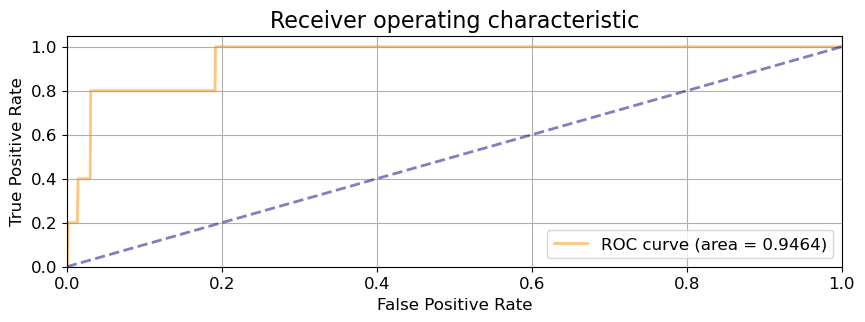

0.9463651974813967

In [101]:
# Для рассчета ROC-AUC на baseline моделе используем тестовые данные
y_pred = model.predict_proba(X_test)[:,1]
# Строим график ROC-AUC
roc_auc = plot_roc_auc(y_true=y_test, y_pred=y_pred)
roc_auc

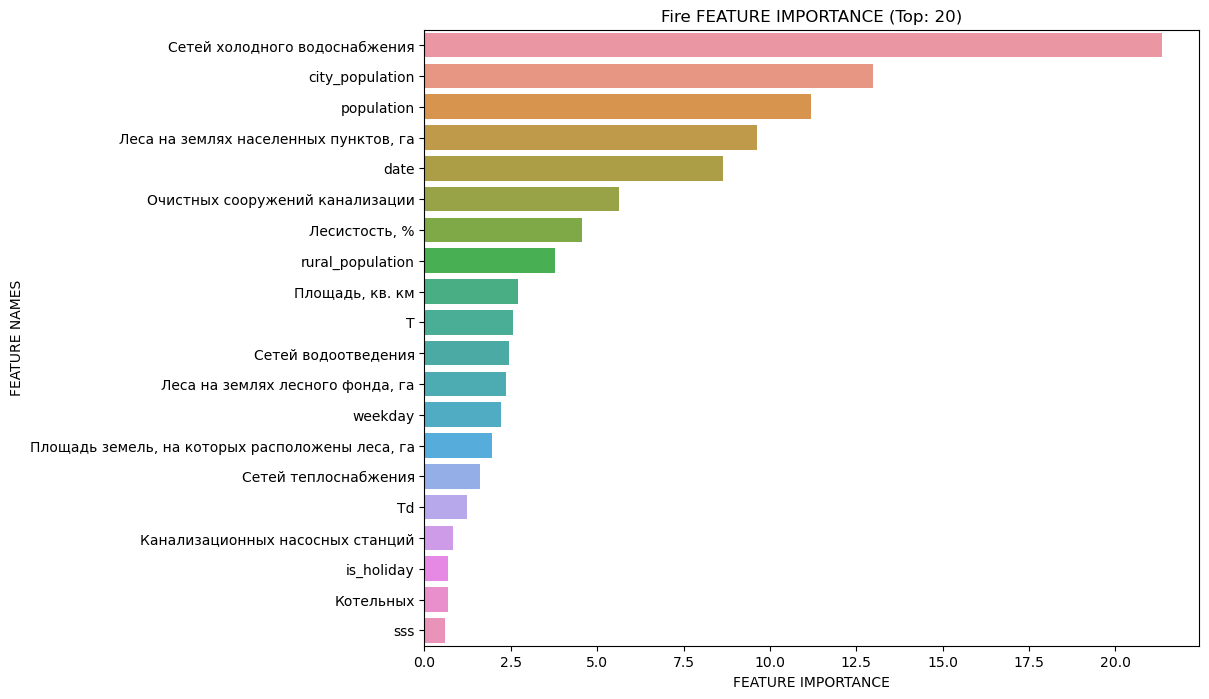

In [102]:
# Важность признаков
fi_df = plot_feature_importance(model.get_feature_importance(), X_test.columns, model_name='Fire', top_n=20)

### Метеоданные
Пояснения к столбцам:  
Ветер - указаны скорость ветра в м/с - средняя за 10 мин, порывы в срок и между сроками (в фигурных скобках) и направление, откуда дует ветер: С - северный,  
СВ - северо-восточный, В - восточный, ЮВ - юго-восточный, Ю - южный, ЮЗ - юго-западный, З - западный, СЗ - северо-западный.  
Видимость - горизонтальная дальность видимости в метрах или километрах. При видимости от 1 до 10 км при отсутствии осадков обычно наблюдается дымка, при ухудшении видимости до 1 км и менее - туман. В сухую погоду видимость может ухудшаться дымом, пылью или мглою.  
Явления - указаны атмосферные явления, наблюдавшиеся в срок или в последний час перед сроком; фигурными скобками обозначены явления, наблюдавшиеся между сроками (за 1-3 часа до срока); квадратными скобками обозначены град или гололедные отложения с указанием их диаметра в мм.  
Облачность - указаны через наклонную черту общая и нижняя облачность в баллах и высота нижней границы облаков в метрах; квадратными скобками обозначены формы облаков: Ci - перистые, Cs - перисто-слоистые, Cc - перисто-кучевые, Ac - высококучевые, As - высокослоистые, Sc - слоисто-кучевые, Ns - слоисто-дождевые, Cu - кучевые, Cb - кучево-дождевые. Подробнее классификацию облаков см. в Атласе облаков (PDF).  
T - Температура воздуха - температура, измеренная на высоте 2 м над землей.  
Td - Температура точки росы - температура, при понижении до которой содержащийся в воздухе водяной пар достигнет насыщения.  
f - Относительная влажность воздуха - влажноcть воздуха, измеренная на высоте 2 м над землей.  
Te - Эффективная температура - температура, которую ощущает одетый по сезону человек в тени. Характеристика душности погоды. При расчете учитывается влияние влажности воздуха и скорости ветра на теплоощущения человека.  
Tes - Эффективная температура на солнце - температура, которую ощущает человек, с поправкой на солнечный нагрев. Характеристика знойности погоды. Зависит от высоты солнца над горизонтом, облачности и скорости ветра. Ночью, в пасмурную погоду, а также при ветре 12 м/с и более поправка равна нулю.  
P - Атмосферное давление - приведенное к уровню моря атмосферное давление.  
Po - Атмосферное давление - измеренное на уровне метеостанции атмосферное давление.  
Tmin - Минимальная температура - минимум температуры воздуха на высоте 2 м над землей.  
Tmax - Максимальная температура - максимум температуры воздуха на высоте 2 м над землей.  
R - Количество осадков - Количество выпавших осадков за период времени, мм. При наведении курсора мыши на число - период времени, за который выпало указанное количество осадков.  
R24 - Количество осадков - Количество выпавших осадков за 24 часа, мм.  
S - Снежный покров - Высота снежного покрова,  